<a href="https://colab.research.google.com/github/anshudhanshu/Startups-Funding-Prediction/blob/main/Sudhanshu_Rawat_Team_5_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predict whether a startup will get funded in the next three months. </u></b>

## <b> Problem Description </b>

### There has been a staggering growth in investments in young age startups in the last 5 years. A lot of big VC firms are increasingly getting interested in the startup funding space. You are given a task to predict whether a startup will get a funding in the next three months using app traction data and startup details. 

### This funding can be either seed funding, Series A, Series B, so on and so forth. 


## <b> Data Description </b>

### In the file, you have monthly data for the startup entities which contains information about various app traction performance.

### <b> In the given data, you have the following variables:
* ### UUID - Unique Identifier for a single startup entity
* ### Month - Month for which the app data is available
* ### Application category - The category to which an application belongs to
* ### Avg Session Time - Average time of the session in app during the month
* ### Total Session Time - Avg session time / user x Open rate = Total session time
* ### Open_rate - No of times app has been opened by a user
* ### Reach - % of devices having the app installed
* ### Funding_ind - Indicator for a funded startup

## <b>Following variables are only available for funded startups:</b>
* ### Business models -  The business model of the startup                            
* ### City - the city where the startup is based out of
* ### Company Stage - the stage of the company
* ### Feed name - 
* ### Founded year - The year in which the startup was founded
* ### Latest funded date - The latest date in which the startup was funded
* ### MAU - % of reach which opened the app in the given month( Monthly Active Users)
* ### Overview - Overview of the startup
* ### Practice Areas - 
* ### Region - Region where the startup operates
* ### Total Funding - Total amount of funding till the month
* ### Uninstall Rate - Rate of uninstall of applications.



In [ ]:
!pip install modin

In [ ]:
!pip install modin[all] # Install all of the above

In [1]:
import numpy as np
import pandas as pd
# import os
# os.environ["MODIN_ENGINE"] = "ray"  # Modin will use Ray
# import modin.pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%%time
startups =pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 4/Week 4/data_driven_investment_0.csv')

CPU times: user 3.28 s, sys: 509 ms, total: 3.79 s
Wall time: 6.7 s


In [4]:
startups.head(30)

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0
5,3d82666e19078799205cee6998a6c5dd8b6add2a,20180801,Travel & Local,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000927,National,NaN,NaN,0.094488,0
6,7dd8f8918e91940bb6f8af0b4889fedaf421d0db,20180801,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000280,National,NaN,NaN,0.096774,0
7,029c8ea1565578af1d3a79dfd186ad6e590ce362,20180801,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000514,National,NaN,NaN,0.134831,0
8,08a19c746c758161bc0436f74163f5e206dad50b,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000021,National,NaN,NaN,0.000000,0
9,0d30ce53c1f76f5ee21425b461ebf28e82728505,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000260,National,NaN,NaN,0.114754,0


In [5]:
 startups.tail(30)

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
1502255,9c4d773cca066e925bd49359d94e138c59d52571,20190101,Communication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000063,National,NaN,NaN,0.038462,0
1502256,d18e947cdc0bbc28b9d60fa9034ff919fc328426,20190101,Communication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000403,National,NaN,NaN,0.326667,0
1502257,d6f0fc3b21e0120c52b754e1241ea2ab9afe9c80,20190101,House & Home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000027,National,NaN,NaN,0.142857,0
1502258,59e51735f1fc2002e9182d3d3f76f6c683fbcc78,20190101,Personalization,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000060,National,NaN,NaN,0.083333,0
1502259,d08dabb9741af09749a15fbea314046560e8ed37,20190101,Video Players & Editors,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000421,National,NaN,NaN,0.141667,0
1502260,294c45eb62d2ea20d3f648559125f97953c7c2d8,20190101,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000026,National,NaN,NaN,NaN,0
1502261,f6687ac42b953473b078ac6c2fdda49363b358c0,20190101,Photography,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000291,National,NaN,NaN,0.146154,0
1502262,87f04f3272e886e94b420fd040c030d4bf26ad5c,20190101,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000117,National,NaN,NaN,0.046512,0
1502263,77e2dd29490b67c6125964fcc32729abc581068c,20190101,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000064,National,NaN,NaN,0.041667,0
1502264,d63c57cb67e5e28a8b7d0c026577924641dd7321,20190101,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000061,National,NaN,NaN,0.038462,0


In [6]:
startups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1502285 entries, 0 to 1502284
Data columns (total 20 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   UUID                  1500803 non-null  object 
 1   month                 1502285 non-null  int64  
 2   Application Category  1502285 non-null  object 
 3   Avg_Session_Time      877763 non-null   float64
 4   Business Models       2750 non-null     object 
 5   City                  2743 non-null     object 
 6   Company Stage         2750 non-null     object 
 7   Feed Name             2750 non-null     object 
 8   Founded Year          2750 non-null     float64
 9   Latest Funded Date    2750 non-null     object 
 10  MAU                   118092 non-null   float64
 11  Open_Rate             877746 non-null   float64
 12  Overview              2750 non-null     object 
 13  Practice Areas        2750 non-null     object 
 14  Reach                 1050970 non-

In [17]:
startups.isnull().sum()

UUID                       1482
month                         0
Application Category          0
Avg_Session_Time         624522
Business Models         1499535
City                    1499542
Company Stage           1499535
Feed Name               1499535
Founded Year            1499535
Latest Funded Date      1499535
MAU                     1384193
Open_Rate                624539
Overview                1499535
Practice Areas          1499535
Reach                    451315
Region                        0
Total Funding (USD)     1499759
Total_Session_Time       624589
Uninstall_Rate          1150001
funding_ind                   0
dtype: int64

In [21]:
funded_startups = startups[startups['funding_ind']==1]
funded_startups.shape

(2750, 20)

In [22]:
funded_startups.isnull().sum()

UUID                       0
month                      0
Application Category       0
Avg_Session_Time        1058
Business Models            0
City                       7
Company Stage              0
Feed Name                  0
Founded Year               0
Latest Funded Date         0
MAU                     2291
Open_Rate               1058
Overview                   0
Practice Areas             0
Reach                    794
Region                     0
Total Funding (USD)      224
Total_Session_Time      1058
Uninstall_Rate          1710
funding_ind                0
dtype: int64

In [7]:
startups.describe()

,month,Avg_Session_Time,Founded Year,MAU,Open_Rate,Reach,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
count,1.502285e+06,877763.000000,2750.000000,118092.000000,877746.000000,1.050970e+06,2.526000e+03,877696.000000,352284.000000,1.502285e+06
mean,2.019719e+07,1.623398,2014.632000,0.398440,3.940700,1.068854e-03,1.270335e+08,5.963753,0.144642,1.830545e-03
std,5.532754e+03,2.253496,4.000254,0.208611,4.537303,1.692271e-02,4.955262e+08,9.593728,0.130946,4.274570e-02
min,2.018070e+07,0.000033,1983.000000,0.000019,1.000000,0.000000e+00,6.200000e+01,0.000033,0.000000,0.000000e+00
25%,2.019120e+07,0.417683,2014.000000,0.235294,1.875000,3.022203e-07,2.014807e+06,1.085491,0.056637,0.000000e+00
50%,2.020030e+07,0.889806,2015.000000,0.388791,2.933333,5.137744e-06,9.973513e+06,2.726576,0.107383,0.000000e+00
75%,2.020040e+07,1.917254,2017.000000,0.546220,4.500000,7.543001e-05,4.187457e+07,6.614369,0.190809,0.000000e+00
max,2.020060e+07,58.561333,2020.000000,1.000000,80.000000,9.990408e-01,7.201430e+09,149.983317,1.000000,1.000000e+00


In [8]:
startups.describe(include='object')

,UUID,Application Category,Business Models,City,Company Stage,Feed Name,Latest Funded Date,Overview,Practice Areas,Region
count,1500803,1502285,2750,2743,2750,2750,2750,2750,2750,1502285
unique,147741,48,317,31,13,189,251,350,138,1
top,4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27,Education,Social Platforms > Interest Based > Education ...,Bangalore,Seed,Social Platforms\nTest Preparation Tech,2020-09-25,Q&A-based education community,FinTech,National
freq,2671,202603,232,781,1251,233,232,232,359,1502285


In [9]:
not_null_avg_time_df=startups[~startups['Avg_Session_Time'].isnull()]

In [10]:
not_null_avg_time_df.shape

(877763, 20)

In [11]:
not_null_df = startups.dropna()
not_null_df.shape

(435, 20)

In [12]:
startups[startups['Company Stage']== 'Series A']['Avg_Session_Time'].median()

0.8452855929031058

In [13]:
startups[startups['Company Stage']== 'Series B']['Avg_Session_Time'].median()

1.1597418680543208

In [14]:
startups[startups['Company Stage']== 'Series C']['Avg_Session_Time'].median()

0.9566043956228956

In [26]:
# Median Avg_Session_Time for each Company Stage
print("Company_Stage  Median Avg_Session_Time")
for stage in startups['Company Stage'].unique()[1:]:
  print(stage,end=":\t")
  print(startups[startups['Company Stage']== stage]['Avg_Session_Time'].median())
  print()

Company_Stage  Median Avg_Session_Time
Series A:	0.8452855929031058

Seed:	1.1466028996847815

Series B:	1.1597418680543208

Series D:	1.1877597818775476

Series C:	0.9566043956228956

Series H:	1.0398141319678857

Acquired:	1.359713622404322

Series J:	nan

Series E:	2.257690865591402

Series I:	0.6084284571679509

Series F:	1.3817414865250521

Funded:	4.015873104070217

Series G:	1.0485492057541907



In [25]:
# Mean Avg_Session_Time for each Company Stage
print("Company_Stage  Mean Avg_Session_Time")
for stage in startups['Company Stage'].unique()[1:]:
  print(stage,end=":\t")
  print(startups[startups['Company Stage']== stage]['Avg_Session_Time'].mean())
  print()

Company_Stage  Mean Avg_Session_Time
Series A:	1.3716280934024514

Seed:	1.87132003701909

Series B:	2.1865301918938616

Series D:	1.5445236571738787

Series C:	1.566963894546688

Series H:	1.0699148538314946

Acquired:	1.4737326445464154

Series J:	nan

Series E:	1.5992154684920021

Series I:	0.6347854630185972

Series F:	1.347736590610043

Funded:	4.073137388757522

Series G:	1.067974072279323



In [29]:
# Median Uninstall Rate for each Company Stage
print("Company_Stage  Mean Uninstall Rate")
for stage in startups['Company Stage'].unique()[1:]:
  print(stage,end=":\t")
  print(startups[startups['Company Stage']== stage]['Uninstall_Rate'].median())
  print()

Company_Stage  Mean Uninstall Rate
Series A:	0.12569832402234635

Seed:	0.12335299630630134

Series B:	0.12108472543107551

Series D:	0.11162735287109836

Series C:	0.1311475409836066

Series H:	0.11724137931034485

Acquired:	0.10476190476190472

Series J:	0.07699154428126387

Series E:	0.09417539806946618

Series I:	0.09819979108918059

Series F:	0.10332950631458092

Funded:	0.07275132275132273

Series G:	0.0650521656998872



In [30]:
# Mean Uninstall Rate for each Company Stage
print("Company_Stage  Mean Uninstall Rate")
for stage in startups['Company Stage'].unique()[1:]:
  print(stage,end=":\t")
  print(startups[startups['Company Stage']== stage]['Uninstall_Rate'].mean())
  print()

Company_Stage  Mean Uninstall Rate
Series A:	0.13603426038798164

Seed:	0.15612784639131766

Series B:	0.1792365939546728

Series D:	0.12469005848941926

Series C:	0.14414882574361904

Series H:	0.10950911243866461

Acquired:	0.12213158231566766

Series J:	0.08320118129035962

Series E:	0.09792365921542732

Series I:	0.0952301291732481

Series F:	0.1615591730296482

Funded:	0.07275132275132273

Series G:	0.08537016811071932



In [20]:
categories = startups['Application Category'].unique()

In [19]:
Stages = startups['Company Stage'].unique()

### **Analysing UUID**

In [ ]:
startups['UUID'].describe()

count                                      1500803
unique                                      147741
top       4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27
freq                                          2671
Name: UUID, dtype: object

In [ ]:
startups['UUID'].isnull().sum()

1482

In [ ]:
startups[startups['UUID'].isnull()].isnull().sum()

UUID                    1482
month                      0
Application Category       0
Avg_Session_Time         816
Business Models         1482
City                    1482
Company Stage           1482
Feed Name               1482
Founded Year            1482
Latest Funded Date      1482
MAU                     1424
Open_Rate                816
Overview                1482
Practice Areas          1482
Reach                    382
Region                     0
Total Funding (USD)     1482
Total_Session_Time       816
Uninstall_Rate          1298
funding_ind                0
dtype: int64

In [ ]:
startups[~startups['UUID'].isnull()].isnull().sum()

UUID                          0
month                         0
Application Category          0
Avg_Session_Time         623706
Business Models         1498053
City                    1498060
Company Stage           1498053
Feed Name               1498053
Founded Year            1498053
Latest Funded Date      1498053
MAU                     1382769
Open_Rate                623723
Overview                1498053
Practice Areas          1498053
Reach                    450933
Region                        0
Total Funding (USD)     1498277
Total_Session_Time       623773
Uninstall_Rate          1148703
funding_ind                   0
dtype: int64

In [ ]:
startups['UUID'].value_counts()

4e5ad248d207eaf680153dbbf3b2f5bdf3fa6f27    2671
a8febb4b767f83022235f3f34a2241ed1e13db2f    1778
524889f05a60933210abde13d9db9211986698ac    1575
061d769832ed6fa2e6f5f7923348f7f074e6aa91    1531
10a07f3aa16935a1b5a79c0d19bf5e4044cd5f21    1282
                                            ... 
9c4d55eb96d1a2e4d8c8b276169457d952000945       1
c4c6deea0cecc6a7a76088d0378a4efb3f7703f2       1
6e851fd2b5bbb5c2994c325de8169f99278bbe71       1
569d8232145a20cace9169719867463ff51ff09d       1
84a78c626e7b9eb2ab84786c51a26e0b612b5e5b       1
Name: UUID, Length: 147741, dtype: int64

In [ ]:
startups['Company Stage'].unique()

array([nan, 'Series A', 'Seed', 'Series B', 'Series D', 'Series C',
       'Series H', 'Acquired', 'Series J', 'Series E', 'Series I',
       'Series F', 'Funded', 'Series G'], dtype=object)

In [ ]:
startups[startups['Company Stage']  == 'Series A' ].dropna()['Total Funding (USD)']

30713       5588693.0
32144       6483790.0
32898      10422240.0
32977      19022522.0
35416      14996449.0
              ...    
1418498    12331649.0
1418499    12331649.0
1418500    12331649.0
1419670    11544081.0
1421441    12331649.0
Name: Total Funding (USD), Length: 79, dtype: float64

In [ ]:
startups[startups['Company Stage']  == 'Series A' ]['Total Funding (USD)'].mean()

15556360.92204301

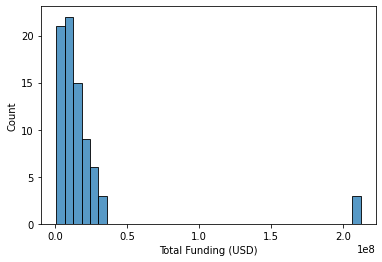

In [ ]:
sns.histplot(startups[startups['Company Stage']  == 'Series A' ].dropna()['Total Funding (USD)'])

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

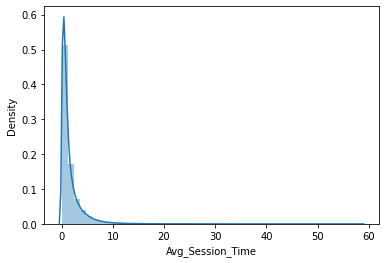

In [ ]:
sns.distplot(not_null_avg_time_df.Avg_Session_Time)

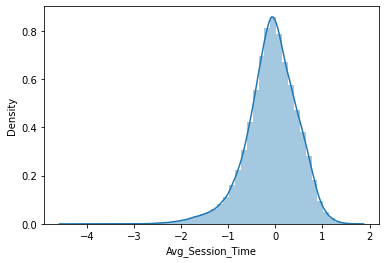

In [ ]:
sns.distplot(np.log10(not_null_avg_time_df.Avg_Session_Time))

In [ ]:
null_avg_time = startups[startups['Avg_Session_Time'].isnull()]
null_avg_time.head(30)

,UUID,month,Application Category,Avg_Session_Time,Business Models,City,Company Stage,Feed Name,Founded Year,Latest Funded Date,MAU,Open_Rate,Overview,Practice Areas,Reach,Region,Total Funding (USD),Total_Session_Time,Uninstall_Rate,funding_ind
0,c1ad38e2d357610c129657d870ede902e8abfcb9,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042963,National,NaN,NaN,0.024443,0
1,d841e670d9191f896a0cbc75961920887b375756,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003244,National,NaN,NaN,0.009828,0
2,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000161,National,NaN,NaN,0.235294,0
3,0a59d138b3eaccd22b665eae70c756fef83ddb63,20180801,Books & Reference,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000077,National,NaN,NaN,0.350000,0
4,df5fb9891f77df24a91d039f1817c6c4e79244ef,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000939,National,NaN,NaN,0.312500,0
5,3d82666e19078799205cee6998a6c5dd8b6add2a,20180801,Travel & Local,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000927,National,NaN,NaN,0.094488,0
6,7dd8f8918e91940bb6f8af0b4889fedaf421d0db,20180801,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000280,National,NaN,NaN,0.096774,0
7,029c8ea1565578af1d3a79dfd186ad6e590ce362,20180801,Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000514,National,NaN,NaN,0.134831,0
8,08a19c746c758161bc0436f74163f5e206dad50b,20180801,Productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000021,National,NaN,NaN,0.000000,0
9,0d30ce53c1f76f5ee21425b461ebf28e82728505,20180801,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000260,National,NaN,NaN,0.114754,0


In [ ]:
null_avg_time.shape

(624522, 20)

In [ ]:
null_avg_time.isnull().sum()

UUID                       816
month                        0
Application Category         0
Avg_Session_Time        624522
Business Models         623464
City                    623467
Company Stage           623464
Feed Name               623464
Founded Year            623464
Latest Funded Date      623464
MAU                     624481
Open_Rate               624460
Overview                623464
Practice Areas          623464
Reach                      113
Region                       0
Total Funding (USD)     623595
Total_Session_Time      624483
Uninstall_Rate          384661
funding_ind                  0
dtype: int64

In [ ]:
null_avg_time['funding_ind'].value_counts()

0    623464
1      1058
Name: funding_ind, dtype: int64

UUID

  ['c1ad38e2d357610c129657d870ede902e8abfcb9'
 'd841e670d9191f896a0cbc75961920887b375756'
 '0a59d138b3eaccd22b665eae70c756fef83ddb63' ...
 'edcbe5f1ad6b3c0400e60d38a07a5cdaabc4b1a8'
 'e9f9a92b05dbb720db6d49a85b2ed243fe373ccd'
 '6495e1a3ddf8ac88f119ba60eb5880da263d588c']
month

  [20180801 20190601 20191201 20200301 20190201 20200201 20190301 20200601
 20180901 20190701 20181201 20190801 20190901 20180701 20181001 20181101
 20191001 20200101 20200501 20190401 20200401 20190501 20191101 20190101]
Application Category

  ['Books & Reference' 'Finance' 'Productivity' 'Travel & Local' 'Education'
 'Health & Fitness' 'Lifestyle' 'Music & Audio' 'Medical' 'Business'
 'Maps & Navigation' 'Social' 'Shopping' 'Tools' 'Puzzle' 'Adventure'
 'Sports' 'Casual' 'Food & Drink' 'Art & Design' 'Entertainment' 'Card'
 'Racing' 'Photography' 'Board' 'Role Playing' 'Action' 'Simulation'
 'Strategy' 'Educational' 'News & Magazines' 'Video Players & Editors'
 'Personalization' 'Weather' 'Communication'